In [ ]:
# Fake News Detection System
# Task 3: Detection of fake news using machine learning techniques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Loading datasets...
Dataset shape: (44898, 5)

Sample data:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  

Missing values:
title      0
text    

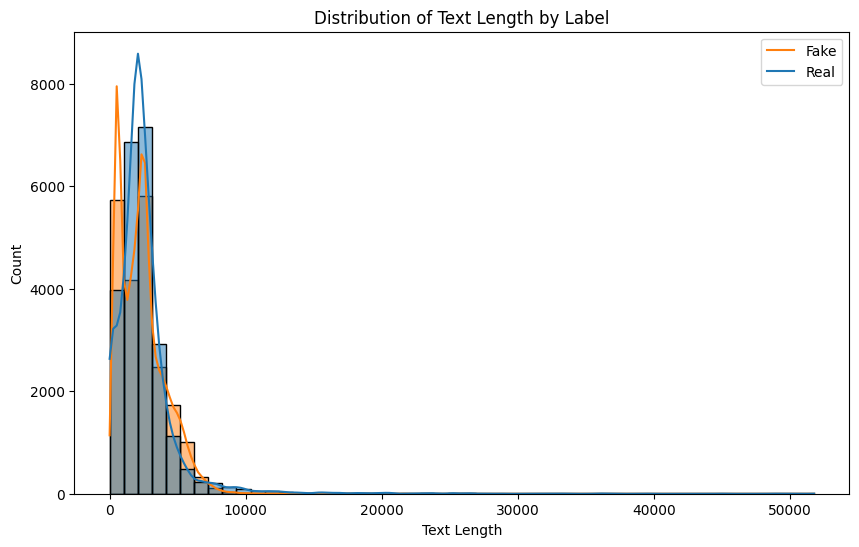

In [ ]:
# 1. Data Loading and Exploration
print("Loading datasets...")

# Load the real and fake news datasets
# Adjust these paths if your dataset files are named differently
try:
    df_fake = pd.read_csv('/content/fake.csv')
    df_true = pd.read_csv('/content/true.csv')

    # Add a label column to each dataset
    df_fake['label'] = 0  # 0 for fake news
    df_true['label'] = 1  # 1 for true news

    # Combine the datasets
    df = pd.concat([df_fake, df_true]).reset_index(drop=True)

    print(f"Dataset shape: {df.shape}")
    print("\nSample data:")
    print(df.head())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Distribution of classes
    print("\nClass distribution:")
    print(df['label'].value_counts())

except FileNotFoundError:
    print("Error: Dataset files not found. Please check the file paths.")

# Display some statistics about text length
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.legend(['Fake', 'Real'])
plt.show()


In [ ]:

# 2. Data Cleaning and Text Preprocessing
def clean_text(text):
    """
    Function to clean and preprocess text data
    """
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text cleaning to 'text' column
print("Cleaning text data...")
df['cleaned_text'] = df['text'].apply(clean_text)

print("\nSample cleaned text:")
print(df[['text', 'cleaned_text']].head(2))


Cleaning text data...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# First, properly download NLTK resources
import nltk

# Download required NLTK resources
print("Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
print("NLTK resources downloaded successfully!")

# 2. Data Cleaning and Text Preprocessing
def clean_text(text):
    """
    Function to clean and preprocess text data
    """
    # Check if text is a string (handle potential NaN values)
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize - with error handling
    try:
        tokens = word_tokenize(text)
    except LookupError:
        # Fallback simple tokenization if NLTK tokenizer fails
        tokens = text.split()

    # Remove stopwords - with error handling
    try:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    except LookupError:
        # If stopwords resource is missing, keep all tokens
        pass

    # Stemming - with error handling
    try:
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(word) for word in tokens]
        tokens = stemmed_tokens
    except:
        # Skip stemming if it fails
        pass

    # Lemmatization - with error handling
    try:
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        tokens = lemmatized_tokens
    except LookupError:
        # Skip lemmatization if it fails
        pass

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply text cleaning to 'text' column
print("Cleaning text data...")
# Process in smaller batches to avoid memory issues (optional)
df['cleaned_text'] = df['text'].apply(clean_text)

print("\nSample cleaned text:")
print(df[['text', 'cleaned_text']].head(2))

NLTK resources downloaded successfully!
Cleaning text data...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample cleaned text:
                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   

                                        cleaned_text  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  


In [ ]:

# 3. Feature Extraction
print("Extracting features...")

# Split data into training and testing sets
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Extracting features...


Training models...

Naive Bayes Results:
Accuracy: 0.9452

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4733
           1       0.94      0.95      0.94      4247

    accuracy                           0.95      8980
   macro avg       0.94      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



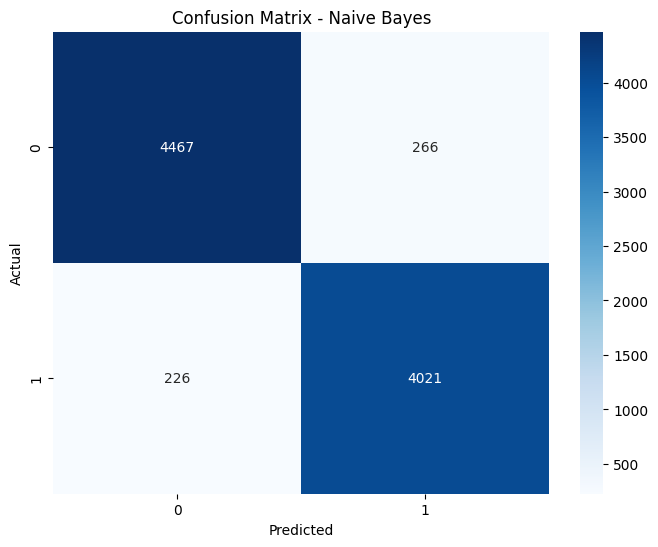


Random Forest Results:
Accuracy: 0.9979

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



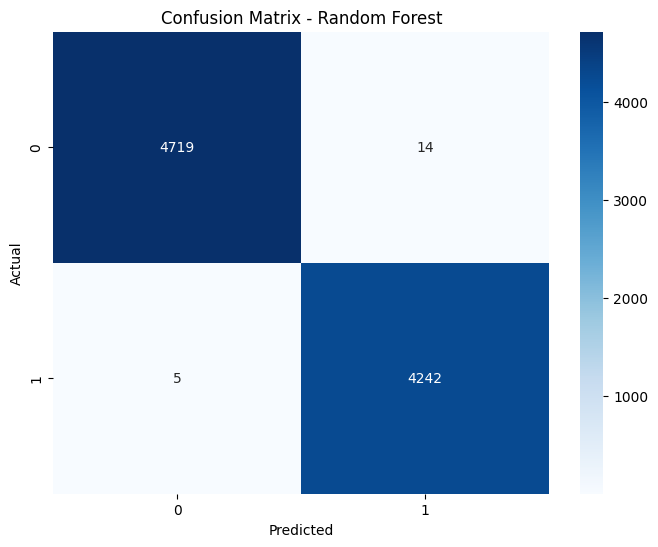


Saving the best performing model: Random Forest


In [ ]:

# 4. Model Training and Evaluation
print("Training models...")

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

print("\nNaive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

# Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the best performing model and vectorizer
if accuracy_score(y_test, nb_pred) > accuracy_score(y_test, rf_pred):
    best_model = nb_model
    model_name = 'Naive Bayes'
else:
    best_model = rf_model
    model_name = 'Random Forest'

print(f"\nSaving the best performing model: {model_name}")
pickle.dump(best_model, open('fake_news_model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))


In [ ]:
# 5. Eye-Catching and Beautiful Web Interface
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Create a stunning visual design with eye-catching elements
stunning_style = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

    .news-detector-container {
        max-width: 900px;
        margin: 0 auto;
        font-family: 'Poppins', sans-serif;
    }

    .header {
        background: linear-gradient(120deg, #8e44ad, #3498db, #2ecc71);
        background-size: 200% 200%;
        animation: gradient-animation 10s ease infinite;
        color: white;
        padding: 30px;
        border-radius: 20px 20px 0 0;
        text-align: center;
        position: relative;
        overflow: hidden;
    }

    @keyframes gradient-animation {
        0% { background-position: 0% 50%; }
        50% { background-position: 100% 50%; }
        100% { background-position: 0% 50%; }
    }

    .header:before {
        content: "";
        position: absolute;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background-image: url('data:image/svg+xml;utf8,<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 100 100" preserveAspectRatio="none"><path d="M0,0 L100,0 L100,100 Z" fill="rgba(255,255,255,0.1)"/></svg>');
        background-size: 100% 100%;
    }

    .header h1 {
        margin: 0;
        font-size: 36px;
        font-weight: 700;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
        letter-spacing: 1px;
    }

    .header p {
        margin: 15px 0 0;
        font-size: 18px;
        font-weight: 300;
        opacity: 0.9;
    }

    .content-panel {
        background-color: white;
        border-radius: 0 0 20px 20px;
        box-shadow: 0 10px 30px rgba(0,0,0,0.15);
        padding: 30px;
        position: relative;
        z-index: 1;
    }

    .input-container {
        position: relative;
        margin-bottom: 25px;
    }

    .input-label {
        font-weight: 600;
        color: #333;
        margin-bottom: 12px;
        display: block;
        font-size: 18px;
        position: relative;
        padding-left: 15px;
    }

    .input-label:before {
        content: "";
        position: absolute;
        left: 0;
        top: 50%;
        transform: translateY(-50%);
        width: 5px;
        height: 20px;
        background: linear-gradient(120deg, #8e44ad, #3498db);
        border-radius: 10px;
    }

    .button-container {
        display: flex;
        gap: 15px;
        margin-top: 20px;
        flex-wrap: wrap;
        justify-content: center;
    }

    .examples-container {
        background: linear-gradient(to right, #f5f7fa, #c3cfe2);
        border-radius: 15px;
        padding: 20px;
        margin-top: 30px;
        position: relative;
        overflow: hidden;
    }

    .examples-container:after {
        content: "";
        position: absolute;
        bottom: 0;
        right: 0;
        width: 150px;
        height: 150px;
        background-image: url('data:image/svg+xml;utf8,<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 100 100"><circle cx="50" cy="50" r="40" fill="none" stroke="rgba(0,0,0,0.05)" stroke-width="8"/></svg>');
        background-size: cover;
        opacity: 0.5;
    }

    .examples-title {
        font-size: 16px;
        color: #333;
        margin-bottom: 15px;
        font-weight: 600;
        display: flex;
        align-items: center;
    }

    .examples-title:before {
        content: "🔍";
        margin-right: 8px;
        font-size: 20px;
    }

    .result-container {
        margin-top: 35px;
        padding: 25px;
        border-radius: 15px;
        animation: slideUp 0.6s cubic-bezier(0.22, 1, 0.36, 1);
        position: relative;
        overflow: hidden;
    }

    @keyframes slideUp {
        from { opacity: 0; transform: translateY(30px); }
        to { opacity: 1; transform: translateY(0); }
    }

    .result-real {
        background: linear-gradient(135deg, #d4fc79 0%, #96e6a1 100%);
    }

    .result-fake {
        background: linear-gradient(135deg, #f6d365 0%, #ff7850 100%);
    }

    .result-icon {
        position: absolute;
        top: 20px;
        right: 20px;
        font-size: 40px;
        opacity: 0.2;
    }

    .result-title {
        font-size: 24px;
        font-weight: 700;
        margin-bottom: 15px;
        color: #333;
    }

    .confidence-text {
        font-size: 16px;
        margin-bottom: 15px;
        color: #333;
        opacity: 0.9;
    }

    .progress-container {
        background-color: rgba(255,255,255,0.5);
        height: 10px;
        border-radius: 20px;
        overflow: hidden;
        box-shadow: inset 0 0 5px rgba(0,0,0,0.1);
    }

    .progress-bar {
        height: 100%;
        border-radius: 20px;
        transition: width 1s cubic-bezier(0.22, 1, 0.36, 1);
    }

    .progress-real {
        background: linear-gradient(to right, #48c6ef, #6f86d6);
    }

    .progress-fake {
        background: linear-gradient(to right, #f83600, #f9d423);
    }

    .footer {
        text-align: center;
        margin-top: 25px;
        color: #666;
        font-size: 14px;
        font-weight: 300;
    }

    /* Custom widget styling */
    .widget-textarea {
        border: 2px solid #e0e0e0 !important;
        border-radius: 15px !important;
        padding: 15px !important;
        transition: all 0.3s !important;
        box-shadow: inset 0 1px 5px rgba(0,0,0,0.05) !important;
        font-family: 'Poppins', sans-serif !important;
        font-size: 15px !important;
    }

    .widget-textarea:focus {
        border-color: #8e44ad !important;
        box-shadow: 0 0 0 3px rgba(142, 68, 173, 0.2) !important;
    }

    /* Cool Button Styles */
    .jupyter-button {
        border-radius: 30px !important;
        font-weight: 600 !important;
        text-transform: uppercase !important;
        letter-spacing: 1px !important;
        font-size: 14px !important;
        padding: 8px 20px !important;
        transition: all 0.3s !important;
        box-shadow: 0 4px 10px rgba(0,0,0,0.1) !important;
        font-family: 'Poppins', sans-serif !important;
    }

    .jupyter-button:hover {
        transform: translateY(-2px) !important;
        box-shadow: 0 6px 15px rgba(0,0,0,0.15) !important;
    }

    .jupyter-button:active {
        transform: translateY(1px) !important;
    }

    .jupyter-button.mod-primary {
        background: linear-gradient(45deg, #4568dc, #b06ab3) !important;
        border: none !important;
    }

    .jupyter-button.mod-info {
        background: linear-gradient(45deg, #00c6ff, #0072ff) !important;
        border: none !important;
    }

    .jupyter-button.mod-warning {
        background: linear-gradient(45deg, #f857a6, #ff5858) !important;
        border: none !important;
    }

    /* Animated dots for loading */
    @keyframes dot-animation {
        0%, 80%, 100% { opacity: 0; transform: scale(0.8); }
        40% { opacity: 1; transform: scale(1); }
    }

    .loading-dots span {
        display: inline-block;
        width: 8px;
        height: 8px;
        border-radius: 50%;
        background-color: currentColor;
        margin-right: 5px;
    }

    .loading-dots span:nth-child(1) {
        animation: dot-animation 1.4s infinite ease-in-out both;
        animation-delay: 0s;
    }

    .loading-dots span:nth-child(2) {
        animation: dot-animation 1.4s infinite ease-in-out both;
        animation-delay: 0.16s;
    }

    .loading-dots span:nth-child(3) {
        animation: dot-animation 1.4s infinite ease-in-out both;
        animation-delay: 0.32s;
    }
</style>
"""

# Eye-catching HTML Layout
layout_html = """
<div class="news-detector-container">
    <div class="header">
        <h1>✨ Fake News Detector ✨</h1>
        <p>Advanced AI-powered news verification system</p>
    </div>

    <div class="content-panel">
        <div class="input-container">
            <label class="input-label">Enter your news article</label>
            <!-- Textarea will be inserted here -->
        </div>

        <div class="button-container">
            <!-- Buttons will be inserted here -->
        </div>

        <div class="examples-container">
            <div class="examples-title">Try with these examples</div>
            <!-- Example buttons will be inserted here -->
        </div>

        <!-- Result output will be inserted here -->
    </div>

    <div class="footer">
        Powered by advanced machine learning • Text classification algorithm
    </div>
</div>
"""

# Display the initial styling and layout
display(HTML(stunning_style + layout_html))

# Create the main interface elements
text_input = widgets.Textarea(
    placeholder='Paste the news text here to verify its authenticity...',
    layout=widgets.Layout(width='100%', height='150px')
)

analyze_button = widgets.Button(
    description='🔮 Verify News',
    button_style='primary',
    tooltip='Analyze the news using AI',
    layout=widgets.Layout(width='auto')
)

clear_button = widgets.Button(
    description='🗑️ Clear',
    button_style='',
    tooltip='Clear the input text',
    layout=widgets.Layout(width='auto')
)

result_output = widgets.Output()

# Example news for quick testing
example_real = widgets.Button(
    description='🌟 Real News',
    button_style='info',
    tooltip='Load an example of real news'
)

example_fake = widgets.Button(
    description='🚫 Fake News',
    button_style='warning',
    tooltip='Load an example of fake news'
)

# Example texts
real_news_example = """NASA has confirmed that the rover Perseverance has successfully landed on Mars and begun its mission to search for signs of ancient life on the red planet. The rover, which is about the size of a car, touched down on February 18, 2021, after a 203-day journey traversing 293 million miles."""

fake_news_example = """Scientists at NASA have discovered aliens on Mars during the latest rover mission but are hiding this information from the public. Anonymous sources within the space agency claim that clear evidence of intelligent life has been transmitted back to Earth but has been classified as top secret."""

# Function to predict news
def predict_news(news_text):
    # Clean the input text
    cleaned_text = clean_text(news_text)

    # Vectorize the text
    text_tfidf = tfidf_vectorizer.transform([cleaned_text])

    # Make prediction
    prediction = best_model.predict(text_tfidf)[0]
    probabilities = best_model.predict_proba(text_tfidf)[0]

    # Get confidence
    if prediction == 1:
        result_type = "AUTHENTIC"
        confidence = probabilities[1]
        result_class = "result-real"
        progress_class = "progress-real"
        icon = "✅"
    else:
        result_type = "FAKE"
        confidence = probabilities[0]
        result_class = "result-fake"
        progress_class = "progress-fake"
        icon = "⚠️"

    # Return beautiful HTML result
    return f"""
    <div class="result-container {result_class}">
        <div class="result-icon">{icon}</div>
        <div class="result-title">This news appears to be {result_type}</div>
        <div class="confidence-text">AI Confidence Level: <strong>{confidence:.2%}</strong></div>
        <div class="progress-container">
            <div class="progress-bar {progress_class}" style="width: {confidence*100}%"></div>
        </div>
    </div>
    """

# Button click handlers
def on_analyze_clicked(b):
    with result_output:
        clear_output()
        text = text_input.value

        if not text.strip():
            display(HTML("""
                <div style="padding: 25px; background: linear-gradient(to right, #fffbd5, #b20a2c);
                         border-radius: 15px; margin-top: 35px; animation: slideUp 0.6s;">
                    <div style="font-size: 22px; color: #333; font-weight: 600; margin-bottom: 10px;">
                        ⚠️ Nothing to analyze
                    </div>
                    <div style="color: #333; font-size: 16px;">
                        Please enter some news text for our AI to analyze.
                    </div>
                </div>
            """))
        else:
            # Show loading animation
            display(HTML("""
                <div style="text-align: center; padding: 20px; color: #666;">
                    <div style="font-weight: 500; margin-bottom: 10px;">Analyzing news...</div>
                    <div class="loading-dots">
                        <span></span><span></span><span></span>
                    </div>
                </div>
            """))

            # Clear the loading animation and show results
            clear_output()
            result_html = predict_news(text)
            display(HTML(result_html))

def on_clear_clicked(b):
    text_input.value = ""
    with result_output:
        clear_output()

def on_real_example_clicked(b):
    text_input.value = real_news_example

def on_fake_example_clicked(b):
    text_input.value = fake_news_example

# Connect button handlers
analyze_button.on_click(on_analyze_clicked)
clear_button.on_click(on_clear_clicked)
example_real.on_click(on_real_example_clicked)
example_fake.on_click(on_fake_example_clicked)

# Display the interface elements
display(text_input)
display(widgets.HBox([analyze_button, clear_button]))
display(widgets.HBox([example_real, example_fake]))
display(result_output)

Textarea(value='', layout=Layout(height='150px', width='100%'), placeholder='Paste the news text here to verif…

Output()